### Healthcare Spending Data 
Author: Kareem Hamoudeh

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

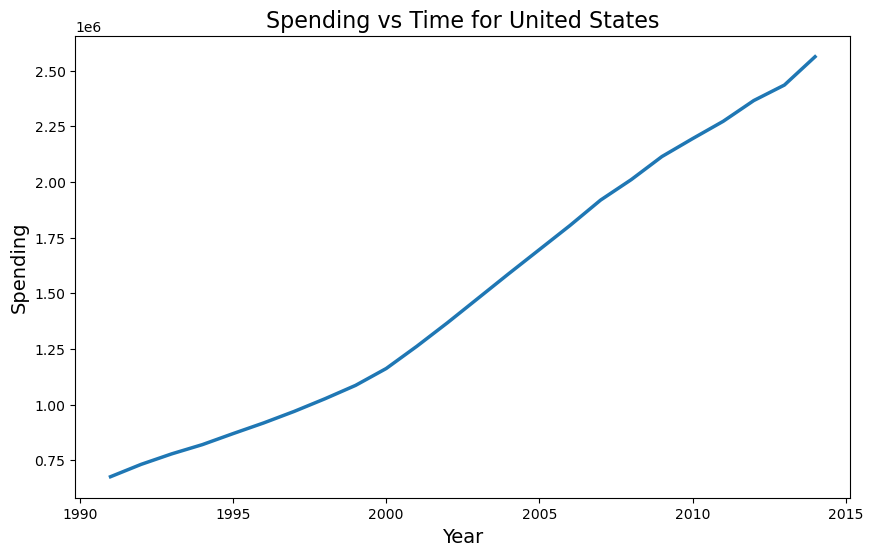

In [5]:
df = pd.read_csv("Data/healthcare-spending.csv", skiprows=[0,1,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])

df_melted = df.melt(id_vars=['Location'], var_name='Year', value_name='Spending')
df_melted['Year'] = pd.to_datetime(df_melted['Year'].str.slice(stop=4), format='%Y').dt.year

USdf = df_melted[df_melted['Location'] == 'United States']

# Seaborn

plt.figure(figsize=(10, 6))
sns.lineplot(data=USdf, x="Year", y="Spending", linewidth=2.5)

plt.title("Spending vs Time for United States", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Spending", fontsize=14)

plt.show()


# Interactive plotly
fig = px.line(USdf, x="Year", y="Spending",
              title=f"Spending vs Time for United States",
              labels={"Year": "Year", "Spending": "Spending"})

# Display the plot
fig.show()


In [6]:
states = df_melted[df_melted['Location'] != 'United States']


fig = px.line(states, x="Year", y="Spending", color="Location",
              title="Spending vs Time by Location",
              labels={"Year": "Year", "spending": "Spending", "Location": "Location"},
              template="plotly_white")

fig.update_layout(showlegend=False)

fig.show()

In [7]:
avg_spending_by_state = df_melted[df_melted['Location'] != 'United States']
avg_spending_by_state = avg_spending_by_state.groupby('Location')['Spending'].mean().reset_index()

# Create the bar plot
fig = px.bar(avg_spending_by_state, x="Location", y="Spending",
             title="Average Health Care Spending by State",
             labels={"Location": "State", "spending": "Average Spending"},
             template="plotly_white")

# Display the plot
fig.show()

In [8]:
avg_spending_by_state = avg_spending_by_state.sort_values("Spending", ascending=False)
fig = px.bar(avg_spending_by_state, x="Location", y="Spending",
             title="Average Health Care Spending by State",
             labels={"Location": "State", "spending": "Average Spending"},
             template="plotly_white")

fig.show()